In [6]:
from pre_processing import read_pre_processed_data
import utils
from analysis import *
from collaborative_stats import *
import recommend_track
from recommend_track import *

from plots import save_bar_plot
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from IPython.display import Image

import numpy as np
import ast
import wordcloud
import os

client_id = "b1f06ec1ff1e4897854995cc439795da"
client_secret = "e52480557d1d4838a83f9a6b1af16f30"

In [7]:
playlist_df, tracks_df, playlist_tracks_df = read_pre_processed_data('../data/')

In [8]:
tracks_df['id'] = tracks_df['track_uri'].apply(lambda x: x.split(':')[-1])
cluster_tracks_df = pd.read_csv('../data/tracks_cluster.csv',header=0)

### Most Popular Track, Artist and Albums

Plotting top 10 most common tracks...


c:\Roland\5UCSD MS\2024 winter\ECE 143 Unpingco\ece143final\src\plots.py:71: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(df, x=x, y=y, errorbar=None, hue=col_labels, palette=["#7BB594"], orient=orient)


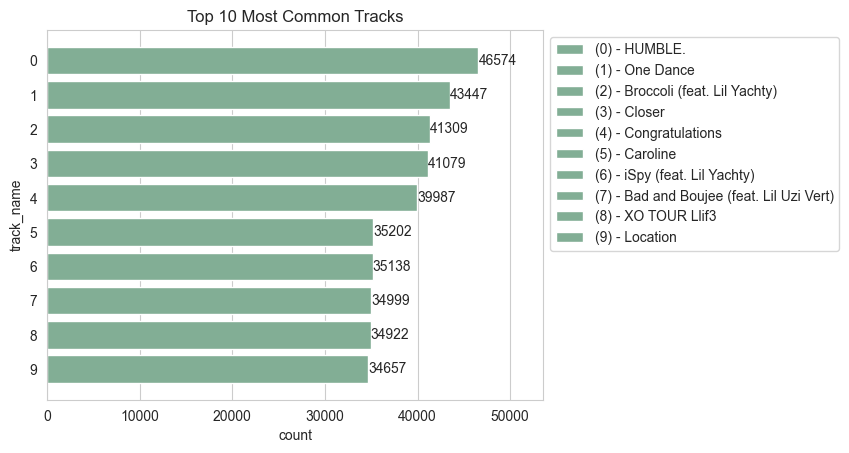

Plotting top 10 most common artists...


c:\Roland\5UCSD MS\2024 winter\ECE 143 Unpingco\ece143final\src\plots.py:71: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(df, x=x, y=y, errorbar=None, hue=col_labels, palette=["#7BB594"], orient=orient)


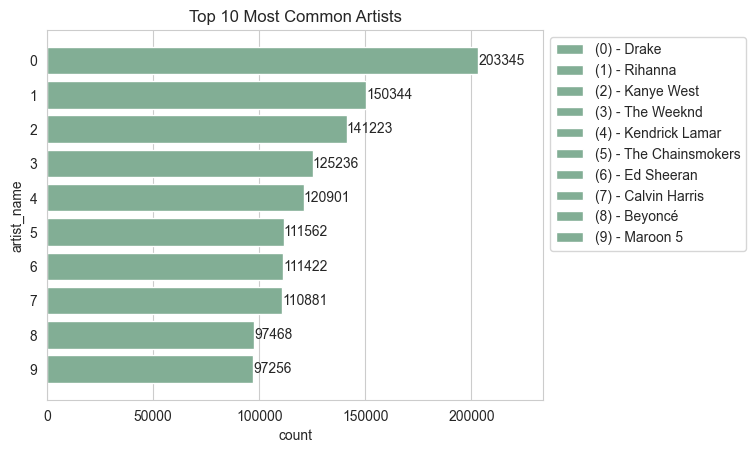

Plotting top 10 most common albums...


c:\Roland\5UCSD MS\2024 winter\ECE 143 Unpingco\ece143final\src\plots.py:71: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(df, x=x, y=y, errorbar=None, hue=col_labels, palette=["#7BB594"], orient=orient)


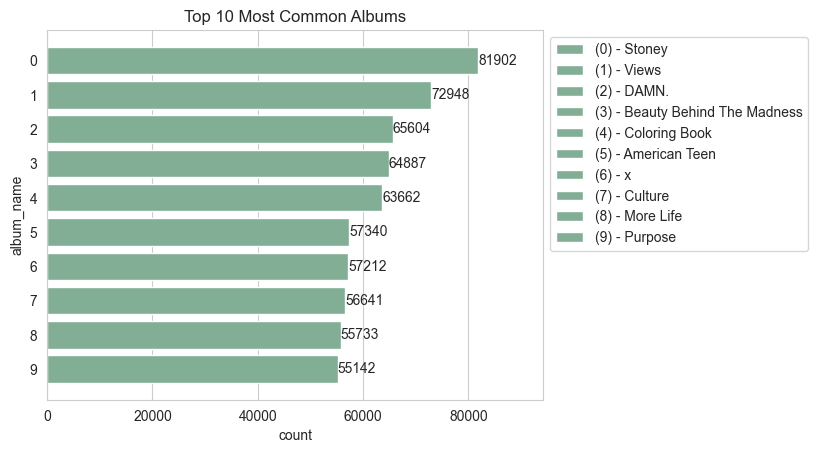

In [9]:
N = 10

# Plot top N tracks
print(f"Plotting top {N} most common tracks...")
top_N_tracks = get_most_common_tracks(tracks_df, playlist_tracks_df, n=N)
save_bar_plot(f"top{N}_tracks.png", top_N_tracks, x="track_name", y="count", title=f"Top {N} Most Common Tracks", orient="h", save = "n")

# Plot top N artists
print(f"Plotting top {N} most common artists...")
top_N_artists = get_most_common_artists(tracks_df, playlist_tracks_df, n=N)
save_bar_plot(f"top{N}_artists.png", top_N_artists, x="artist_name", y="count", title=f"Top {N} Most Common Artists", orient="h", save = "n")

# Plot top N albums
print(f"Plotting top {N} most common albums...")
top_N_albums = get_most_common_albums(tracks_df, playlist_tracks_df, n=N)
save_bar_plot(f"top{N}_albums.png", top_N_albums, x="album_name", y="count", title=f"Top {N} Most Common Albums", orient="h", save = "n")


c:\Roland\5UCSD MS\2024 winter\ECE 143 Unpingco\ece143final\src\plots.py:71: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(df, x=x, y=y, errorbar=None, hue=col_labels, palette=["#7BB594"], orient=orient)


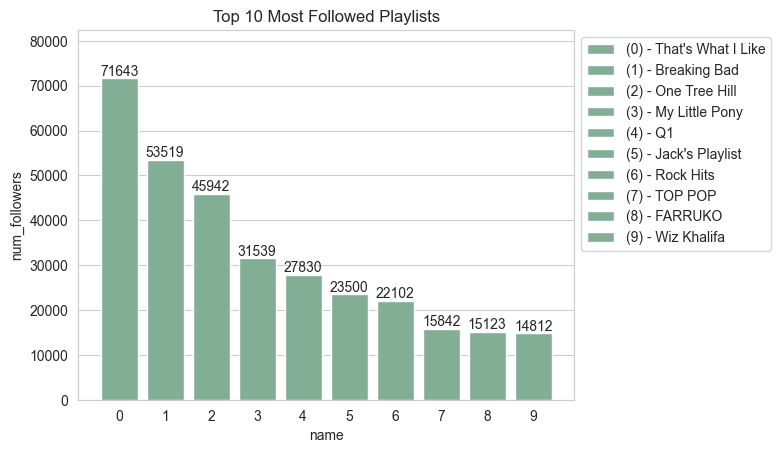

In [10]:
top_10_playlists = most_followed_playlist(playlist_df,N=10)
Image(filename=f"top10_playlist.png")

### Most Prolific Artists

Plotting top 10 most prolific artists...


c:\Roland\5UCSD MS\2024 winter\ECE 143 Unpingco\ece143final\src\plots.py:71: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(df, x=x, y=y, errorbar=None, hue=col_labels, palette=["#7BB594"], orient=orient)


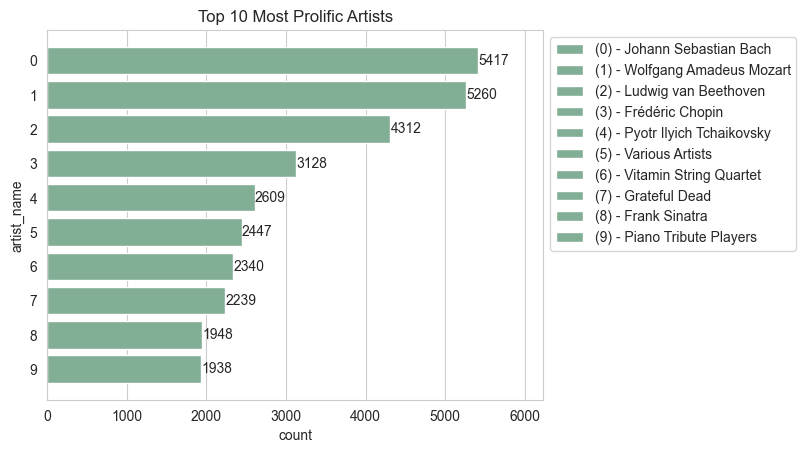

In [11]:
# Plot top N artists with the greatest number of unique tracks
print(f"Plotting top {N} most prolific artists...")
top_N_prolific_artists = get_most_prolific_artists(tracks_df, playlist_tracks_df, n=N)
save_bar_plot(f"top{N}_prolific_artists.png", top_N_prolific_artists, x="artist_name", y="count", title=f"Top {N} Most Prolific Artists", orient="h", save = "n")

### Largest Albums

Plotting top 10 largest albums...


c:\Roland\5UCSD MS\2024 winter\ECE 143 Unpingco\ece143final\src\plots.py:71: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(df, x=x, y=y, errorbar=None, hue=col_labels, palette=["#7BB594"], orient=orient)


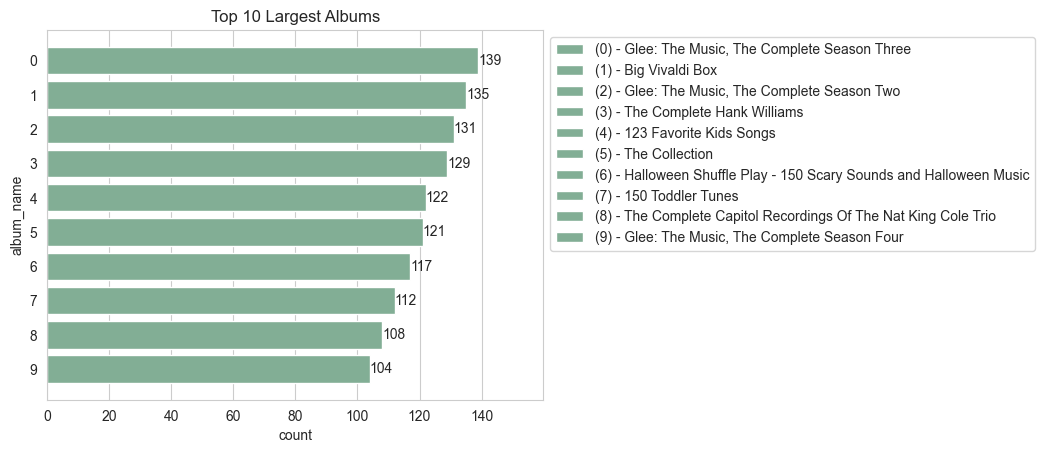

In [12]:
# Plot top N largest albums
print(f"Plotting top {N} largest albums...")
top_N_largest_albums = get_largest_albums(tracks_df, playlist_tracks_df, n=N)
save_bar_plot(f"top{N}_largest_albums.png", top_N_largest_albums, x="album_name", y="count", title=f"Top {N} Largest Albums", orient="h", save = "n")

### Most Popular Artists With Only One Track

Plotting top 10 most prolific artists...


c:\Roland\5UCSD MS\2024 winter\ECE 143 Unpingco\ece143final\src\plots.py:71: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(df, x=x, y=y, errorbar=None, hue=col_labels, palette=["#7BB594"], orient=orient)


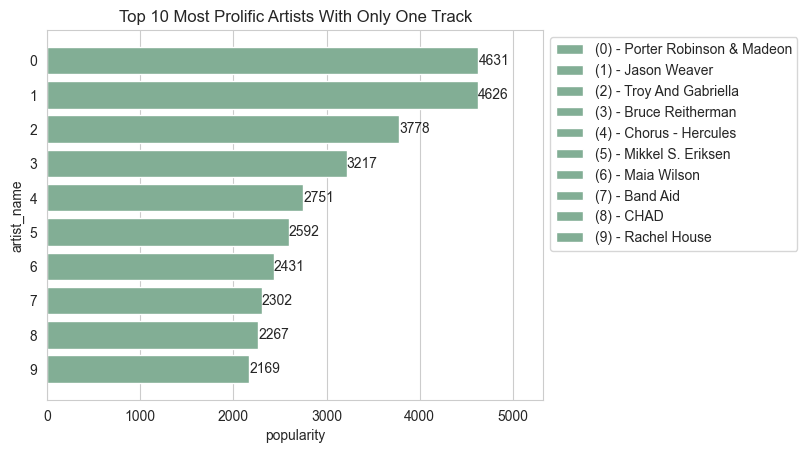

In [13]:
# Plot top N prolific artists with only one track also known as a One Hit Wonder
print(f"Plotting top {N} most prolific artists...")
top_N_prolific_one_hit = get_most_popular_one_hit_wonder(tracks_df, playlist_tracks_df, n=N)
save_bar_plot(f"top{N}_prolific_one_hit.png", top_N_prolific_one_hit, x="artist_name", y="popularity", title=f"Top {N} Most Prolific Artists With Only One Track", orient="h", save = "n")

### Track Durations Standard Deviation Distribution

In [14]:
duration_s_stdevs = get_track_durations_stdev_distribution(tracks_df, playlist_tracks_df)

100%|██████████| 1000000/1000000 [02:55<00:00, 5707.55it/s]


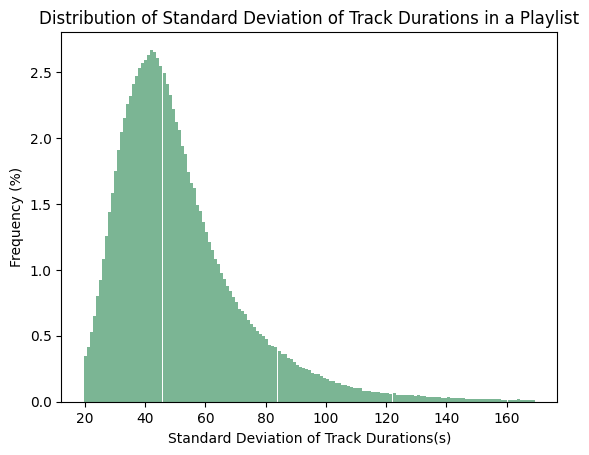

In [15]:
bins = np.linspace(np.percentile(duration_s_stdevs, 1), np.percentile(duration_s_stdevs, 99),
                   int(np.percentile(duration_s_stdevs, 99) - np.percentile(duration_s_stdevs, 1))+1)

# Count the number of elements in each bin
counts, _ = np.histogram(duration_s_stdevs, bins=bins)
counts = counts / np.sum(counts) * 100

# Plot the bar graph
plt.bar(bins[:-1], counts, width=1, color="#7BB594")  # Adjust width as needed
plt.xlabel("Standard Deviation of Track Durations(s)")
plt.ylabel("Frequency (%)")
plt.title("Distribution of Standard Deviation of Track Durations in a Playlist")
plt.show()

#### Playlist With The Greatest Track Durations Standard Deviation

In [16]:
max_stdev_pid, max_stdev = np.argmax(duration_s_stdevs), np.max(duration_s_stdevs)
max_stdev_playlist = playlist_df[playlist_df['pid'] == max_stdev_pid].iloc[0]

# print the basic info about this playlist
print(max_stdev_playlist[['name', 'collaborative', 'num_tracks', 'num_albums', 'num_followers']])

# convert track id to track name and artist name
track_ids = ast.literal_eval(max_stdev_playlist['tracks'])
tracks_df[tracks_df['track_id'].isin(track_ids)][['artist_name', 'track_name', 'duration_s']]

name             Audiobooks
collaborative         False
num_tracks               18
num_albums               11
num_followers             2
Name: 278308, dtype: object


,artist_name,track_name,duration_s
905383,Basil Rathbone,The Raven,501
1072236,Inner Sanctum Mystery,The Tell-Tale Heart (1941) [feat. Boris Karloff],1602
1187965,David Moore,The Yellow Wallpaper,2190
1187966,Edgar Allan Poe,The Pit and the Pendulum (1957),1499
1187967,Richard Mitchley,The Outsider,1024
1187968,DBS Audiobooks,Pride and Prejudice - Jane Austen Part 1 of 2,19672
1187969,DBS Audiobooks,Northanger Abbey - Jane Austen Part 1 of 2,13049
1187970,DBS Audiobooks,Northanger Abbey - Jane Austen Part 2 of 2,11904
1187971,DBS Audiobooks,Persuasion - Jane Austen Part 1 of 2,14557
1187972,DBS Audiobooks,Persuasion - Jane Austen Part 2 of 2,13166


### Artist Diversity Distribution

In [17]:
artist_diversity = get_artist_diversity_distribution(tracks_df, playlist_tracks_df)

100%|██████████| 1000000/1000000 [02:29<00:00, 6675.33it/s]


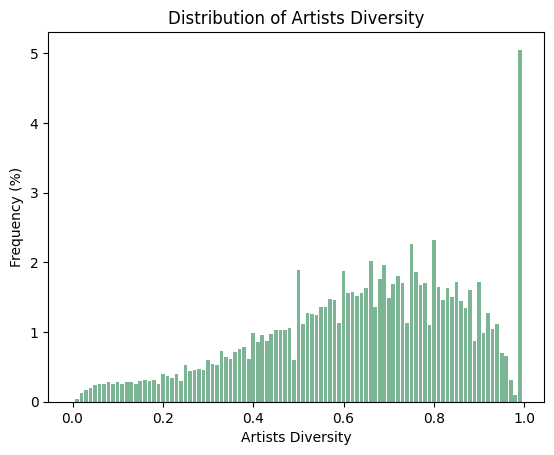

In [18]:
bins = np.linspace(0.0, 1.0, 101)

# Count the number of elements in each bin
counts, _ = np.histogram(artist_diversity, bins=bins)
counts = counts / np.sum(counts) * 100

# Plot the bar graph
plt.bar(bins[:-1], counts, width=0.008, color="#7BB594")  # Adjust width as needed
plt.xlabel("Artists Diversity")
plt.ylabel("Frequency (%)")
plt.title("Distribution of Artists Diversity")
plt.show()

#### Playlist With The Lowest Artists Diversity

In [19]:
min_diversity_pid, min_diversity = np.argmin(artist_diversity), np.min(artist_diversity)
min_diversity_playlist = playlist_df[playlist_df['pid'] == min_diversity_pid].iloc[0]

# print the basic info about this playlist
print(min_diversity_playlist[['name', 'collaborative', 'num_tracks', 'num_albums', 'num_followers', 'num_artists']])

# convert track id to track name and artist name
track_ids = ast.literal_eval(min_diversity_playlist['tracks'])
tracks_df[tracks_df['track_id'].isin(track_ids)][['artist_name', 'track_name', 'duration_s']]

name             Future
collaborative     False
num_tracks          127
num_albums           10
num_followers         1
num_artists           4
Name: 491207, dtype: object


,artist_name,track_name,duration_s
1913,Future,Turn On The Lights,249
18505,Future,Neva End,262
22601,Future,Tony Montana,248
22604,Future,Straight Up,177
34099,Future,Same Damn Time (Remix),273
...,...,...,...
489006,Future,Praise Him (Gospel),261
489007,Future,Moving On,362
489008,Future,Away (Remix),230
619436,Future,Never Seen Those Skit,25


### Correlation Between Features of the Playlists

               num_tracks  num_albums  num_followers  num_artists  duration_s  \
num_tracks       1.000000    0.900415       0.004760     0.818381    0.980797   
num_albums       0.900415    1.000000       0.003484     0.956293    0.885475   
num_followers    0.004760    0.003484       1.000000     0.004227    0.004817   
num_artists      0.818381    0.956293       0.004227     1.000000    0.798549   
duration_s       0.980797    0.885475       0.004817     0.798549    1.000000   
collaborative    0.025203    0.034702      -0.000971     0.042016    0.027902   

               collaborative  
num_tracks          0.025203  
num_albums          0.034702  
num_followers      -0.000971  
num_artists         0.042016  
duration_s          0.027902  
collaborative       1.000000  


C:\Users\w8070\AppData\Local\Temp\ipykernel_8436\1415604712.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + numerical_features)
C:\Users\w8070\AppData\Local\Temp\ipykernel_8436\1415604712.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + numerical_features)


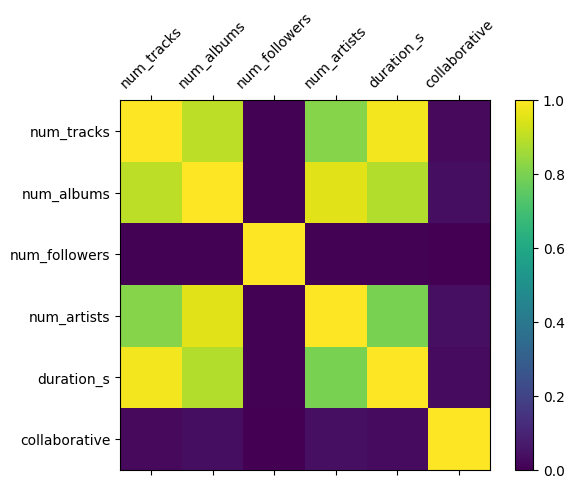

In [20]:
numerical_features = ['num_tracks', 'num_albums', 'num_followers', 'num_artists', 'duration_s', 'collaborative']
fig = plt.figure()
ax = fig.add_subplot(111)
correlation = playlist_df[numerical_features].corr()
print(correlation)
cax = ax.matshow(correlation)
fig.colorbar(cax)
plt.xticks(rotation=45)
ax.set_xticklabels([''] + numerical_features)
ax.set_yticklabels([''] + numerical_features)
plt.show()

### Correlations Between The Artist Diversity And Artist Count

In [21]:
top_100_artists_cnt = get_popular_artist_cnt(tracks_df, playlist_tracks_df)

100%|██████████| 1000000/1000000 [02:34<00:00, 6466.53it/s]


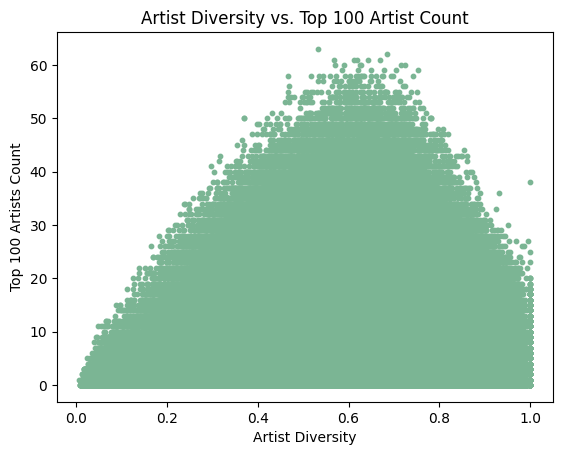

In [22]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

plt.scatter(artist_diversity, top_100_artists_cnt, s=10, c="#7BB594")
plt.xlabel("Artist Diversity")
plt.ylabel("Top 100 Artists Count")
plt.title("Artist Diversity vs. Top 100 Artist Count")
plt.show()

### Most Common Words

In [23]:
exclude_words = [] # ["(feat.", "me", "you", "i", "in", "it", "a"]
c_wfreq = freq_by_collaborative(playlist_df, tracks_df, collaborative=True)
nc_wfreq = freq_by_collaborative(playlist_df, tracks_df, collaborative=False)

Extracting word frequencies: 100%|██████████| 977431/977431 [00:31<00:00, 30714.22it/s]


In [24]:
k = 25
common_words = set(map(lambda x: x[0], c_wfreq[:k])).intersection(set(map(lambda x: x[0], nc_wfreq[:k])))
common_words = list(common_words)
print(k, len(common_words), common_words)

25 23 ['remastered', 'in', 'it', 'and', 'up', 'i', 'you', 'all', "don't", 'my', 'version', 'like', 'the', 'of', 'a', 'love', 'remix', '-', 'me', '(feat.', '&', 'on', 'to']


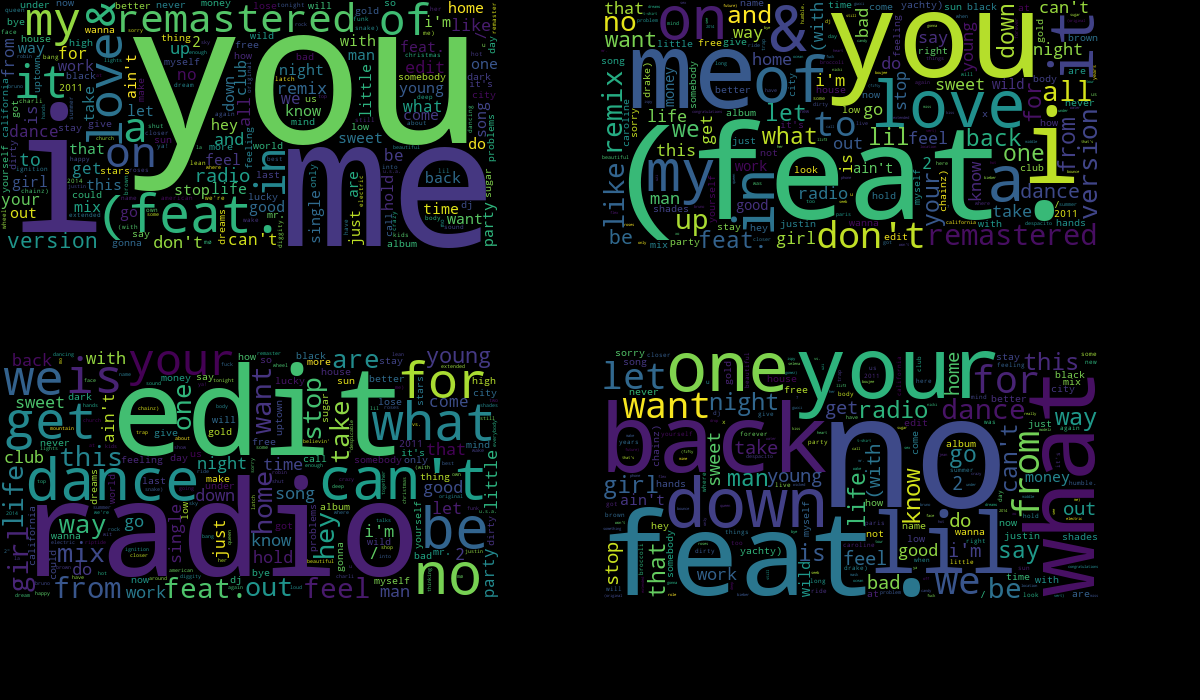

In [25]:
c_excl = create_wordcloud(c_wfreq, exclude_words=common_words)
nc_excl = create_wordcloud(nc_wfreq, exclude_words=common_words)
c_all = create_wordcloud(c_wfreq)
nc_all = create_wordcloud(nc_wfreq)
image_grid([c_all, nc_all, c_excl, nc_excl], 2, 2, padding=100)

### Recommendation System

#### Recommending based on cosine similarity

In [26]:
# Get the track info for the tracks in the top playlist
playlist_id = top_10_playlists.iloc[0]["pid"]
track_audio_features = playlist_track_features(tracks_df, playlist_tracks_df, playlist_id)
track_audio_features.head()

,id,track_name,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
0,5ChkMS8OtdzJeqyybCc9R5,Billie Jean,0.920,0.654,117.046,-3.051,0.847,0.0401,0.015300,0.0360,0.0236
1,5GorFaKkP2mLREQvhSblIg,All My Life,0.629,0.511,128.038,-8.651,0.181,0.0326,0.000004,0.0588,0.1140
2,5W4vPDfwFNQqt7frRjL41t,Bacon,0.709,0.698,143.951,-5.182,0.755,0.0799,0.000000,0.2720,0.0738
3,3l3xTXsUXeWlkPqzMs7mPD,End Of The Road,0.640,0.427,149.703,-9.290,0.529,0.0241,0.000000,0.0579,0.0664
4,3M5eeHXgG4VplKNcsBC8Dj,"Signed, Sealed, Delivered (I'm Yours)",0.670,0.619,108.826,-10.365,0.807,0.0323,0.000000,0.0492,0.0514


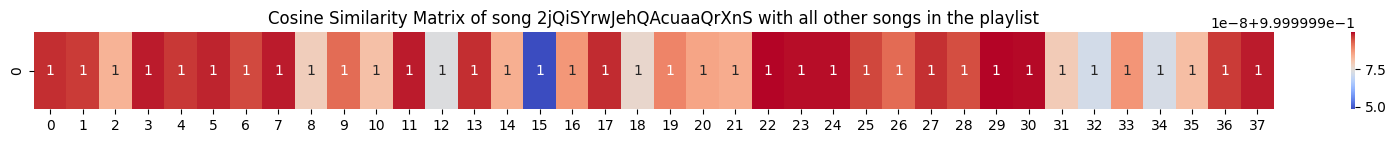

In [27]:
# Get cosine similarity between current track and tracks in givent playlist
cos_sim = reccomended_track_similarity(cluster_tracks_df,track_audio_features,"2jQiSYrwJehQAcuaaQrXnS",plot=True)

In [28]:
# Which is the next similar track to play from the given playlist?
recommended_tracks = next_song_from_playlist(tracks_df,cluster_tracks_df,track_audio_features,"2jQiSYrwJehQAcuaaQrXnS")
recommended_tracks

,id,track_name
2010,7J41dYQolQJEtj3UmKLu5r,End Of The Road
2739,2RqZFOLOnzVmHUX7ZMcaES,California Love - Original Version
3291,3G6hxSp260RzGw4sOiDOQ3,The Way You Make Me Feel - 2012 Remaster
4587,1aWV3uY3SIEZVbmv45oFWS,Bump n' Grind
17001,1OsCKwNZxph96EkNusILRy,U Got It Bad
20327,3R97rNX7JnmshCWBwOSFet,Creep
20745,3l3xTXsUXeWlkPqzMs7mPD,Get Down On It - Single Version
27558,0DBIL8arX0Zo6eAuxNIpik,Let It Go
43037,0sKlV58cODrjxGFOyf9IXY,Case Of The Ex (Whatcha Gonna Do)
79092,1JClFT74TYSXlzpagbmj0S,My Lovin' (You're Never Gonna Get It)


#### Clustering of tracks based on track features

In [29]:
cluster_tracks_df = pd.read_csv('../data/tracks_cluster.csv',header=0)
cluster_tracks_df.head(10)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,cluster
0,0.615,0.1140,-17.285,0.0357,0.926,0.000004,0.1660,0.401,101.189,6QHYEZlm9wyfXfEM1vSu1P,277107,4
1,0.390,0.3100,-14.545,0.0676,0.794,0.000000,0.3790,0.584,177.515,3RkQ3UwOyPqpIiIvGVewuU,330533,2
2,0.505,0.2580,-12.193,0.0297,0.805,0.000000,0.1200,0.641,141.003,0ju1jP0cSPJ8tmojYBEI89,254305,2
3,0.567,0.1980,-18.681,0.0327,0.919,0.000871,0.1350,0.321,92.467,7ny2ATvjtKszCpLpfsGnVQ,412200,14
4,0.380,0.0993,-20.567,0.0509,0.914,0.000023,0.0605,0.440,174.874,18GiV1BaXzPVYpp9rmOg0E,165427,14
5,0.579,0.4790,-10.348,0.0294,0.206,0.002110,0.1630,0.937,135.459,0wfBooQ6QtDm63UIyIcDIj,177200,6
6,0.383,0.2240,-16.990,0.0274,0.768,0.000000,0.0870,0.466,102.940,3xNO6JUk9ySYjxuqzcZYRB,288000,14
7,0.666,0.6170,-10.851,0.0628,0.565,0.000000,0.0498,0.764,105.648,5ka7NFOlZUpVLJmA2tO0o4,389800,15
8,0.702,0.5600,-12.323,0.0342,0.571,0.000000,0.1090,0.889,125.452,2FDTgrYDUdQKyGmtynEk90,171107,4
9,0.717,0.8040,-7.563,0.0342,0.664,0.000010,0.3490,0.488,121.017,2GbmNHjKB1HxSnyobburxg,165933,7


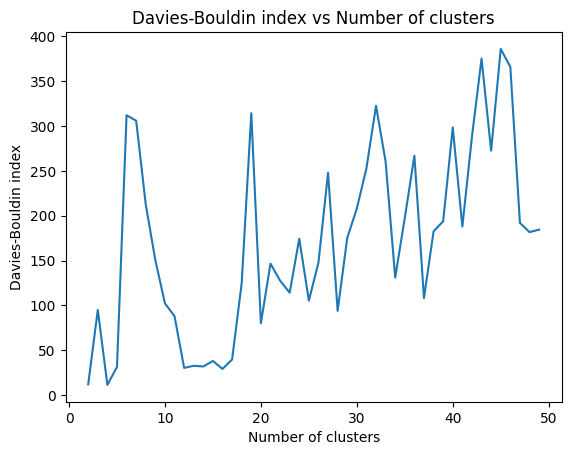

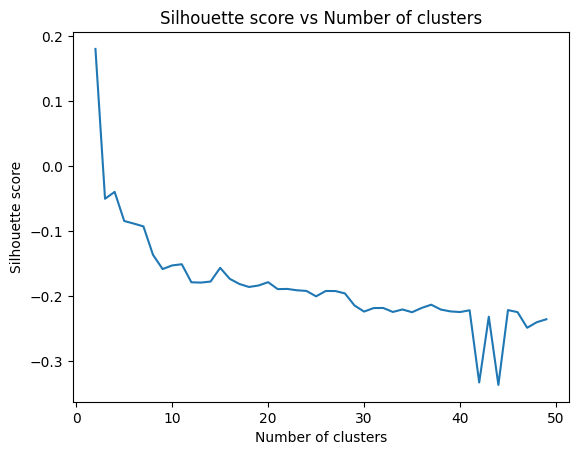

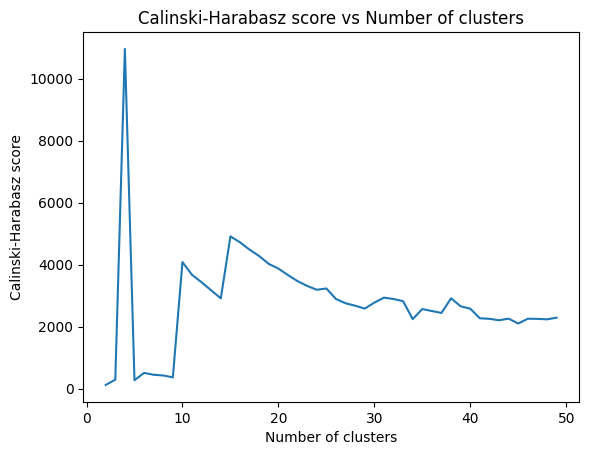

In [ ]:
tracks_feature_df = cluster_tracks_df.drop(columns=['cluster',],axis=1)
cluster_analysis(tracks_feature_df)

In [ ]:
# Correct way to aggregate specific features across clusters
cluster_tracks_df = clustering_tracks(tracks_feature_df,k=18)
cluster_tracks_df.to_csv('../data/tracks_cluster.csv',index=False)

### Reccommend next song to the playlist from tracks_df

In [ ]:
# Reccommend next song to the playlist from tracks_df
recommended_tracks = get_recommendation_from_cluster(cluster_tracks_df,tracks_df,"2jQiSYrwJehQAcuaaQrXnS")
print(recommended_tracks)

                           id                  track_name
7171   6SwRhMLwNqEi6alNPVG00n     LOYALTY. FEAT. RIHANNA.
8691   0zu383xVfq68H6XkHZ8prP               Broken Pieces
9811   64Kn7kkCZDPQGt9TiXH3go     Bringing Down the Giant
10641  2Q659ZNGaigzIlL8D7oM2J                Phase Me Out
13343  46fcIFmBmXbVmjSUbTODk0  Ready for Us (feat. Sykes)
20285  2N3Q67zEpXwJ8a09wg2A4f            Night Won't Fall
20472  0DSIv9DJruGLaRRLKKgit3            NY Is Killing Me
23930  2e4FBygHA19B233VpRmEMC          The More I See You
29499  7M2cKcvCnflzp9WcxGjlbm                 Barbed Wire
49092  3nOIAbewLk1lDm6DRykltl                   The Throw


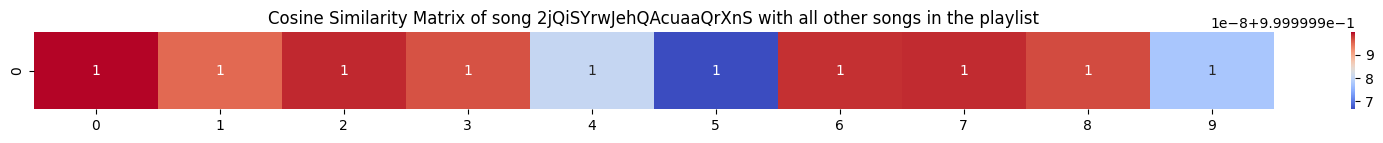

In [ ]:
reccomended_track_similarity(tracks_df,recommended_tracks,cluster_tracks_df,"2jQiSYrwJehQAcuaaQrXnS")